<a href="https://colab.research.google.com/github/Salman-Fazal-7/Me-vs-My-friend/blob/main/feature_extraction(data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

# mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original_dataset_dir = './drive/My Drive/images' #path to directories
base_dir = './drive/My Drive/Colab Notebooks/work'

In [ ]:
import os, shutil
import numpy as np

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Adding a densely connected classifier on top of the convolutional base(pre-trained)

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


# Build Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout # import Dropout
import keras

model = Sequential()

model.add(conv_base)
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Freezing

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#ImageDataGenerator has been moved to tensorflow.keras.preprocessing.image

In [ ]:
batch_size = 20

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 288 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


# Compile

In [ ]:
from tensorflow.keras import optimizers # Import the optimizers module from tensorflow.keras

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5), # Use learning_rate instead of lr
              metrics=['acc'])

# fitting

In [ ]:
history = model.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator)

Epoch 1/30
15/15 [==============================] - 189s 12s/step - loss: 0.6492 - acc: 0.6319 - val_loss: 0.5512 - val_acc: 0.7812
Epoch 2/30
15/15 [==============================] - 8s 549ms/step - loss: 0.5581 - acc: 0.7743 - val_loss: 0.4615 - val_acc: 0.8906
Epoch 3/30
15/15 [==============================] - 7s 473ms/step - loss: 0.4991 - acc: 0.8194 - val_loss: 0.4071 - val_acc: 0.9375
Epoch 4/30
15/15 [==============================] - 7s 452ms/step - loss: 0.4710 - acc: 0.8368 - val_loss: 0.3754 - val_acc: 0.8984
Epoch 5/30
15/15 [==============================] - 8s 540ms/step - loss: 0.4448 - acc: 0.8368 - val_loss: 0.3274 - val_acc: 0.9609
Epoch 6/30
15/15 [==============================] - 7s 472ms/step - loss: 0.4084 - acc: 0.8924 - val_loss: 0.2926 - val_acc: 0.9766
Epoch 7/30
15/15 [==============================] - 8s 530ms/step - loss: 0.3828 - acc: 0.8681 - val_loss: 0.2692 - val_acc: 0.9688
Epoch 8/30
15/15 [==============================] - 7s 469ms/step - loss: 0.

# Plotting

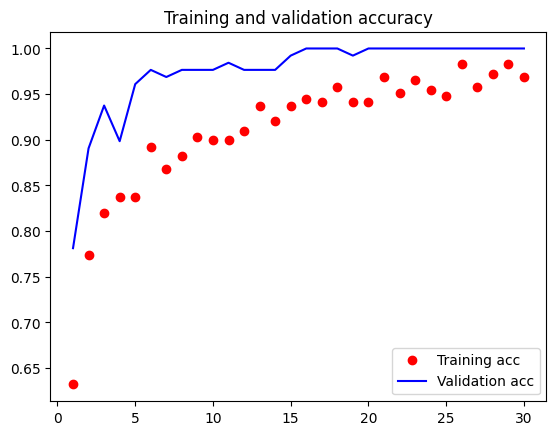

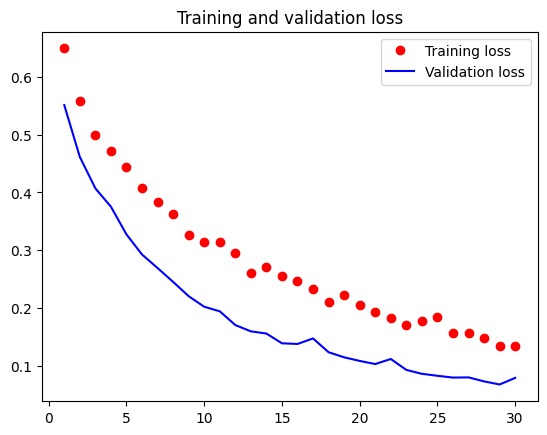

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('salman_and_rizwan_4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
